# Introduction to blockchain HW 1

## Problem 1 (10 points)

Assume that at the end of the term an instructor uses an RSA Public Key Cryptosystem to sign the grades sent to students and to the Education Office. He signs each grade with his private key and transmits both the grade and the signature in a secure manner encrypted with a public key. After you decrypt the message you use his public key to decipher the signature and verify the grade. Assume the cryptosystem has the following features: n=55, e=33 and that the grading system features integer grades from 0 to 10. You have received the grade-signature pairs 8||13 and 6||41

1.Verify that the grades you received are indeed originating from the instructor showing just intermediate results of your calculation (2 points)

Open key {e,n} = {33,55}, received messages: {$m_1,s_1$} = {8,13}, {$m_2,s_2$} = {6,41}. To prove grades we need to calculate $m' = s^e mod(n)$ and check with m.
Let's do it: $m'_1 = s_1^e mod(n) = 13^{33} mod(55) = 8, m'_2 = s_2^e mod(n) = 41^{33} mod(55) = 6$
That means, that $m_1' = m_1, m_2' = m_2$, grades are correct and come from instructor.

2.Given the information above only can you fabricate the instructors’ signature for another grade? If yes, for which grade and how? (3 points)

We can use multiplicative property of RSA, let's create new message as a product of 2 messages received $m_{new} = m*m mod(n)$, it will have $s_{new} = s*smod(n)$, because we have grades from 0 to 10, the only variant is to create $m_{new} = 8*8 mod(55) = 9 $, signature $s_{new} = 13*13 mod(55) = 4$. 

Let's prove, that attack is correct:
new message {$m_{new},s_{new}$} = {9,4}, 

then signature proof: $m'_{new} = s_{new}^e mod(n) = 4^{33} mod(55) = 9$, so we corrupted the message and received grade 9.

3.What would you advise the instructor to do so as to prevent such fabrication? (2 points)

To prevent such fabrication, I advise the instructor to increase $n = pq$, It will help in case, that it will be more complicated to find such product from previous messages, that will corrupt the grade and signature and increase the real grade.

4.Discuss what can go wrong in case the instructor sends a grade secretly by first enciphering it with a student’s public key, then signing it with his private key. Provide an example (3 points) 

Due to the fact, that structure of signing and encoding message are made in a similar way, we can provide our new fake keys to change our grade. Let's give an example:

Encoding: $c = m^{e} mod(n)$

Decoding: $c^{d}mod(n)$

Signing: $s = m^{d}mod(n)$

Proof of signature: $m' = s^{e}mod(n), m' = m$

Let the grade be denoted as $g$, $\{e_{s},n_{s}\}$ - opened key for student. Imagine, we want grade $g_{new} = 2g$. Let's find new $n_s$ and new $e_s$. It's done from equation: $(g^3)^{e_{s}/3}mod(n_s) = (8g^3)^{e_{s}/3}mod(n_s) \rightarrow ((2^{e_s} - 1)g^3)^{e_{s}/3}mod(n_s) = 0$. 

Now we can denote $g = 3$, for it $n_s = (2^{e_s} - 1)*g = 7*g = 21$, $e_s = 9$, so we can see, that: 
$(3^{3})mod(21) = (6^{3})mod(21)$, so we corrupted our grade.


## Problem 2 (10 points)

El-Gamal is videly used cryptographic standart. In this task you will implement El-Gamal encryption scheme using Python

1.Implement function for generating keys. The function must generate big random prime number (problem of generating big prime numbers was discussed during seminar after lecture 3). (2 points)

In [1]:
from random import randint
import math

def is_prime(num, test_count):
    if num == 1:
        return False
    if test_count >= num:
        test_count = num - 1
    for x in range(test_count):
        val = randint(1, num - 1)
        if pow(val, num-1, num) != 1:
            return False
    return True

def generate_big_prime(n, test_count=1000):
    found_prime = False
    while not found_prime:
        p = randint(2**(n-1), 2**n)
        if is_prime(p, test_count):
            return p
def roots(n):
    coprime_set = {num for num in range(1, n) if math.gcd(num, n) == 1}
    out = [g for g in range(1, n) if coprime_set == {pow(g, powers, n)
            for powers in range(1, n)}]
    return out[randint(0,len(out))]

def gen_key(n):
    p = generate_big_prime(n)
    x = randint(1,p-1)
    g = roots(p)
    y = (g**x)%p
    return p,g,x,y



2.Implement functions that realize the encryption and decryption functions. (2 points)

In [2]:
def encrypt(m,n):
    p,g,x,y = gen_key(n)
    if m > p:
        return 0
    else:
        k = randint(1,p-1)
        a = (g**k)%p
        b = ((y**k)*m)%p
    return a,b,p,x

def decrypt(a,b,p,x):
    m = (b*a**(p-1-x))%p
    return m

3.Test your functions on random values and show that your realization works correctly (1 point)

In [3]:
def test(n):
    number =  randint(1,2**(n-1))
    print('Message:', number)
    a,b,p,x = encrypt(number,n)
    print('Encrypcted: (a,b) = ',a,b)
    d = decrypt(a,b,p,x)
    print('Decrypted, message:', d)


In [4]:
test(10)

Message: 209
Encrypcted: (a,b) =  197 535
Decrypted, message: 209


4.Implement functions that realize creation and verification of digital signature (2 points)

In [5]:
def egcd(n1, n2):
    if n1 == 0:
        return (n2, 0, 1)
    else:
        g, y, x = egcd(n2 % n1, n1)
        return (g, x - (n2 // n1) * y, y)

def inv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('Inv does not exist')
    else:
        return x % m
    
def hashed(m):
    return m%199

In [6]:
def sig_create(m,n):
    p,g,x,y = gen_key(n)
    m1 = hashed(m)
    k = randint(1,p-1)
    while math.gcd(k,p-1) != 1:
        k += 1 
    r = (g**k)%p
    s = ((m1 - x*r)*inv(k,p-1))%(p-1)
    return m,r,s,p,g,y
    
def sig_verify(m,r,s,p,g,y):
    if  0 < r < p  or 0 < s < p-1:
        m1 = hashed(m)
        left = (y**r)*(r**s)%p
        right = (g**m1)%p
        if left == right:
            print('Signature right:', left,'=',right)
        else:
             raise Exception('Wrong signature!')
    else: 
        raise Exception('Wrong signature!')

5.Test your functions on random values and show that your algorithm works correctly (1 point)

In [7]:
def test1(n):
    number =  randint(1,2**(n-1))
    print('Message:', number)
    m,r,s,p,g,y = sig_create(number,n)
    print('Signatured message: (m,r,s)= ',m,r,s)
    sig_verify(m,r,s,p,g,y)

In [8]:
test1(10)

Message: 25
Signatured message: (m,r,s)=  25 459 720
Signature right: 223 = 223


## Problem 3 (15 points)

1.Implement SHA256 (https://en.wikipedia.org/wiki/SHA-2) hashing algorithm using the pseudo-code below. Note the great increase in mixing between bits of the w[16..63] words compared to SHA-1 (10 points)

In [9]:
hash_values=[
    '0x6a09e667','0xbb67ae85','0x3c6ef372','0xa54ff53a',
    '0x510e527f','0x9b05688c','0x1f83d9ab','0x5be0cd19'
]

const=[
   '0x428a2f98', '0x71374491', '0xb5c0fbcf', '0xe9b5dba5', '0x3956c25b', '0x59f111f1', '0x923f82a4', '0xab1c5ed5',
   '0xd807aa98', '0x12835b01', '0x243185be', '0x550c7dc3', '0x72be5d74', '0x80deb1fe', '0x9bdc06a7', '0xc19bf174',
   '0xe49b69c1', '0xefbe4786', '0x0fc19dc6', '0x240ca1cc', '0x2de92c6f', '0x4a7484aa', '0x5cb0a9dc', '0x76f988da',
   '0x983e5152', '0xa831c66d', '0xb00327c8', '0xbf597fc7', '0xc6e00bf3', '0xd5a79147', '0x06ca6351', '0x14292967',
   '0x27b70a85', '0x2e1b2138', '0x4d2c6dfc', '0x53380d13', '0x650a7354', '0x766a0abb', '0x81c2c92e', '0x92722c85',
   '0xa2bfe8a1', '0xa81a664b', '0xc24b8b70', '0xc76c51a3', '0xd192e819', '0xd6990624', '0xf40e3585', '0x106aa070',
   '0x19a4c116', '0x1e376c08', '0x2748774c', '0x34b0bcb5', '0x391c0cb3', '0x4ed8aa4a', '0x5b9cca4f', '0x682e6ff3',
   '0x748f82ee', '0x78a5636f', '0x84c87814', '0x8cc70208', '0x90befffa', '0xa4506ceb', '0xbef9a3f7', '0xc67178f2'
]

In [10]:
def message_bit_return(string):
    bits=[]
    bits_str=''
    for i in range(len(string)):
        bits.append(str(format(ord(string[i]),'08b')))
    for i in range(len(bits)):
        bits_str+=bits[i]
    return(bits_str)


def preprocessing(message):
    m = message +'1'
    k = 0
    while (len(message)+1+k)%512 != 448:
        k += 1
    m = m + '0'*k
    m = m + str(format(len(message),'064b'))
    return m

def message_split_512(m):
    k = int(len(m)/512)
    a = []
    for i in range(k):
        a.append(m[512*i:512*(i+1)]) 
    return a

def message_split_32(m):
    b = [[] for k in range(len(m))]
    for i in range(len(m)):
        for j in range(int(len(m[i])/32)):
            b[i].append(m[i][32*j:32*(j+1)])
    return b
        
def shr(m,n):
    a = '0'*n
    for i in range(len(m)-n):
        a += m[i]
    return a

def rotr(m,n):
    a = ''
    for i in range(n):
        a += m[len(m)-n+i]
    for j in range(0,len(m)-n):
        a += m[j]
    return a
        
def XOR(str1,str2):
    a = ''
    for i in range(len(str1)):
        if str1[i] == '0' and str2[i] == '0':
            a += '0'
        if str1[i] == '1' and str2[i] == '0':
            a += '1'
        if str1[i] == '0' and str2[i] == '1':
            a += '1'
        if str1[i] == '1' and str2[i] == '1':
            a += '0'
    return a

def AND(str1,str2):
    a = ''
    for i in range(len(str1)):
        if str1[i] == '0' and str2[i] == '0':
            a += '0'
        if str1[i] == '1' and str2[i] == '0':
            a += '0'
        if str1[i] == '0' and str2[i] == '1':
            a += '0'
        if str1[i] == '1' and str2[i] == '1':
            a += '1'
    return a

def NOT(str1):
    a = ''
    for i in range(len(str1)):
        if str1[i] == '0':
            a +='1'
        if str1[i] == '1':
            a +='0'
    return a

In [11]:
def extend(m):
    for i in range(len(m)):
        for j in range(16,64):
            str_1 = XOR(rotr(m[i][j-15],7),rotr(m[i][j-15],18))
            s_0 = XOR(str_1,shr(m[i][j-15],3))
            str_2 = XOR(rotr(m[i][j-2],17),rotr(m[i][j-2],19))
            s_1 = XOR(str_2,shr(m[i][j-2],10))
            s_0 = int(s_0,2)
            s_1 = int(s_1,2)
            k_1 = int(m[i][j-16],2)
            k_2 =  int(m[i][j-7],2)
            out = (s_0 + s_1 + k_1 + k_2)%(2**32)
            out = str(format(out,'032b'))
            m[i].append(out)
    return m



In [12]:
def main(hash_values,const,m):
    w = extend(message_split_32(message_split_512(preprocessing(message_bit_return(m)))))
    h_0 = int(hash_values[0],16)
    h_1 = int(hash_values[1],16)
    h_2 = int(hash_values[2],16)
    h_3 = int(hash_values[3],16)
    h_4 = int(hash_values[4],16)
    h_5 = int(hash_values[5],16)
    h_6 = int(hash_values[6],16)
    h_7 = int(hash_values[7],16) 
    for j in range(len(w)):
        a = format(h_0,'032b')
        b = format(h_1,'032b')
        c = format(h_2,'032b')
        d = format(h_3,'032b')
        e = format(h_4,'032b')
        f = format(h_5,'032b')
        g = format(h_6,'032b')
        h = format(h_7,'032b')
        for i in range(64):
            s_0 = XOR(XOR(rotr(a,2),rotr(a,13)),rotr(a,22))
            M_a = XOR(XOR(AND(a,b),AND(b,c)),AND(a,c))
            s_0 = int(s_0,2)
            M_a = int(M_a,2)
            t_2 = (s_0 + M_a)%(2**32)
            s_1 = XOR(XOR(rotr(e,6),rotr(e,11)),rotr(e,25))
            Ch = XOR(AND(e,f),AND(NOT(e),g))
            s_1 = int(s_1,2)
            Ch = int(Ch,2)
            constt = int(const[i],16)
            z = int(w[j][i],2)
            h = int(h,2)
            t_1 = (h+s_1+Ch+constt+z)%(2**32)
            h = format(int(g,2),'032b')
            g = format(int(f,2), '032b')
            f = format(int(e,2), '032b')
            e = format((int(d,2) + t_1)%(2**32), '032b')
            d = format(int(c,2), '032b')
            c = format(int(b,2), '032b')
            b = format(int(a,2), '032b')
            a = format((t_1 + t_2)%(2**32), '032b')
        h_0 = (h_0 + int(a,2))%(2**32)
        h_1 = (h_1 + int(b,2))%(2**32)
        h_2 = (h_2 + int(c,2))%(2**32)
        h_3 = (h_3 + int(d,2))%(2**32)
        h_4 = (h_4 + int(e,2))%(2**32)
        h_5 = (h_5 + int(f,2))%(2**32)
        h_6 = (h_6 + int(g,2))%(2**32)
        h_7 = (h_7 + int(h,2))%(2**32)
    h_0 = str(format(h_0, '08x'))
    h_1 = str(format(h_1, '08x'))
    h_2 = str(format(h_2, '08x'))
    h_3 = str(format(h_3, '08x'))
    h_4 = str(format(h_4, '08x'))
    h_5 = str(format(h_5, '08x'))
    h_6 = str(format(h_6, '08x'))
    h_7 = str(format(h_7, '08x')) 
    return str(h_0+h_1+h_2+h_3+h_4+h_5+h_6+h_7)


            
        

2.Calculate hashes of the texts below (1 point)

In [13]:
string_small = 'This is a very small string with a few characters.'
string_larger = 'This is a larger string that contains more characters.'
string_big = 'This is a larger string that contains more characters. This demonstrates that no matter how big the input stream is, the generated hash is the same size (but of course, not the same value). If two files have a different hash, they surely contain different data.'
string_empty = ''

In [14]:
main(hash_values,const, string_small)

'551bfc4b109bec23bbf29ba0e8c4520f194ae77d0c1839b052552deb23774f07'

In [15]:
main(hash_values,const, string_larger)

'e3c7ba4a5ff68765249cc065a5198b1b8be94b67910a946f1fbaa995daecb51a'

In [16]:
main(hash_values,const, string_big)

'14d7885558ff807137a02f6b610df0e680e34ebf5a2565d44e138443fb82e891'

In [17]:
main(hash_values,const, string_empty)

'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855'

3.What is a bit length of each hash? (1 point)

256 bits

4.What is the bitwise distance between them? What is bitwise distance between their hashes? (1 point)

In [18]:
a = message_bit_return(string_small)
b = message_bit_return(string_larger)
c = message_bit_return(string_big)
d = message_bit_return(string_empty)

In [19]:
e = str(format(int(main(hash_values,const, string_small),16),'256b'))
f = str(format(int(main(hash_values,const, string_larger),16),'256b'))
g = str(format(int(main(hash_values,const, string_big),16),'256b'))
h = str(format(int(main(hash_values,const, string_empty),16),'256b'))
        

In [20]:
def dist(a,b):
    dist = 0
    if len(a) != len(b):
        if len(a)  > len(b):
            b += '0'*(len(a)-len(b))
        else:
            a += '0'*(len(b)-len(a))
    for i in range(len(a)):
        if a[i] != b[i]:
            dist +=1
        else:
            continue
    return dist/len(a)

In [21]:
print('Distance between a and b =', dist(a,b))
print('Distance between a and c =', dist(a,c))
print('Distance between a and d =', dist(a,d))
print('Distance between b and c =', dist(b,c))
print('Distance between b and d =', dist(b,d))
print('Distance between c and d =', dist(c,d))

Distance between a and b = 0.28935185185185186
Distance between a and c = 0.4109195402298851
Distance between a and d = 0.445
Distance between b and c = 0.3510536398467433
Distance between b and d = 0.45601851851851855
Distance between c and d = 0.4454022988505747


In [22]:
print('Distance between e and f =', dist(e,f))
print('Distance between e and g =', dist(e,g))
print('Distance between e and h =', dist(e,h))
print('Distance between f and g =', dist(f,g))
print('Distance between f and h =', dist(f,h))
print('Distance between g and h =', dist(g,h))

Distance between e and f = 0.5546875
Distance between e and g = 0.46875
Distance between e and h = 0.5078125
Distance between f and g = 0.48828125
Distance between f and h = 0.5
Distance between g and h = 0.50390625


5.Typically use apply hash function to our passwords and texts that we want to digitally sign. Implement digital signature of hashed string using El-Gamal digital signature. Compare the digital signature of pain text and hashed text. (2 points)

In [23]:
x = 123
_,r,s,_,_,_ = sig_create(x,8)

In [24]:
print('Signature = ''(',r,',',s,')')

Signature = ( 24 , 15 )


In [25]:
y = int(main(hash_values,const, '123'),16)

In [26]:
_,r,s,_,_,_ = sig_create(y,8)

In [27]:
print('Signature = ''(',r,',',s,')')

Signature = ( 86 , 101 )


## Problem 4 (15 points)

Merkle hash trees play an important role in forming transaction blocks in blockchain. In this assignment we ask you to plot your own Merkle hash tree and check its' properties. Below we provide you with some code fragment what you can use in your assignment

In [28]:
import matplotlib
import networkx as nx
%matplotlib inline
from networkx import balanced_tree, draw_networkx, draw

Let us plot graph basis for Merkle hash tree

/Users/dzisandy/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{0: Text(0, 4, '0'),
 1: Text(-2, 3, '1'),
 2: Text(2, 3, '2'),
 3: Text(-3, 2, '3'),
 4: Text(-1, 2, '4'),
 5: Text(1, 2, '5'),
 6: Text(3, 2, '6'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

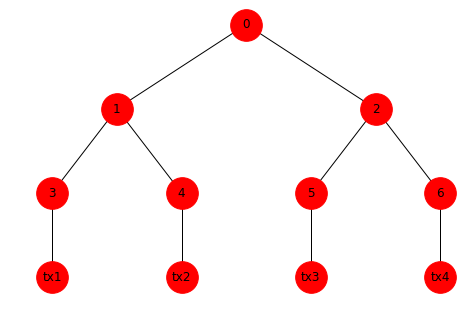

In [29]:
G = nx.Graph()
positions = {}
coordinates = [
    [0, 4],
    [-2, 3],
    [2, 3],
    [-3, 2],
    [-1, 2],
    [1, 2],
    [3, 2],
    [-3, 1],
    [-1, 1],
    [1, 1],
    [3, 1]
]
parents = [0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 6]
for index in range(11):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: 'tx1',
    8: 'tx2',
    9: 'tx3',
    10: 'tx4',
}
nx.draw_networkx_labels(G, positions, labels = labels)

In Bitcoin double sha256 hash scheme is used. Here is an example.

In [30]:
import hashlib


first_hash = hashlib.sha256(b"hello") # "b" stands for binary representation
second_hash = hashlib.sha256()
print('First hash represented as a hexadecimal number:', first_hash.hexdigest())
second_hash.update(first_hash.digest())
print('Second hash represented as a hexadecimal number:', second_hash.hexdigest())

First hash represented as a hexadecimal number: 2cf24dba5fb0a30e26e83b2ac5b9e29e1b161e5c1fa7425e73043362938b9824
Second hash represented as a hexadecimal number: 9595c9df90075148eb06860365df33584b75bff782a510c6cd4883a419833d50


Now we can easily change vertices' labels to hashes of corresponding messages and plot new graph

856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5


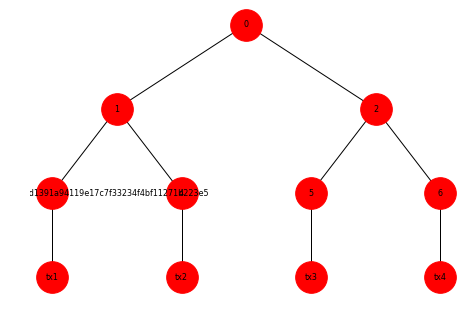

In [31]:
labels[3] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()

# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)
print(labels[3])

1.Construct Merkle hash tree using previously constructed graph by finding corresponding SHA256 hashes on vertices (2 points). Plot obtained Merkle hash tree (1 point)

3: 856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5
4: 79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd
5: ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233
6: 4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e
34: 856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e579043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd
56: ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e02334746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e
1: 41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106
2: 5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73
12: 41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf11065c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73
0: 5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88


{0: Text(0, 4, '5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88'),
 1: Text(-2, 3, '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106'),
 2: Text(2, 3, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-3, 2, '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 4: Text(-1, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(1, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(3, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

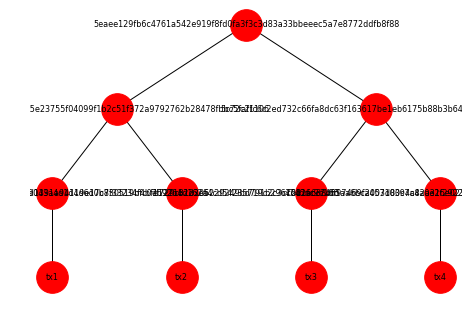

In [32]:
labels[4] = hashlib.sha256(hashlib.sha256(b"tx2").digest()).hexdigest()
labels[5] = hashlib.sha256(hashlib.sha256(b"tx3").digest()).hexdigest()
labels[6] = hashlib.sha256(hashlib.sha256(b"tx4").digest()).hexdigest()
conc_34 = labels[3] + labels[4]
conc_56 = labels[5] + labels[6]
labels[1] = hashlib.sha256(hashlib.sha256(conc_34.encode('utf-8')).digest()).hexdigest()
labels[2] = hashlib.sha256(hashlib.sha256(conc_56.encode('utf-8')).digest()).hexdigest()
conc_12 = labels[1] + labels[2]
labels[0] = hashlib.sha256(hashlib.sha256(conc_12.encode('utf-8')).digest()).hexdigest()
print('3:',labels[3])
print('4:',labels[4])
print('5:',labels[5])
print('6:',labels[6])
print('34:',conc_34)
print('56:',conc_56)
print('1:', labels[1])
print('2:', labels[2])
print('12:',conc_12)
print('0:',labels[0])
nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)


2.Provide a proof of correctness of leaf tx2 (2 points). 

We need to check: $hash(hash(3)+ hash(hash(tx_2))+ hash(2)) = hash(0)$

In [33]:
tx_2 = hashlib.sha256(hashlib.sha256(b"tx2").digest()).hexdigest()
conc_1  = labels[3] + tx_2
hash_1  = hashlib.sha256(hashlib.sha256(conc_1.encode('utf-8')).digest()).hexdigest()
conc_2 = hash_1 + labels[2]
hash_2  = hashlib.sha256(hashlib.sha256(conc_2.encode('utf-8')).digest()).hexdigest()
if hash_2 == labels[0]:
    print('Leaf is correct')

Leaf is correct


3.Provide a proof of correctness for set of leafs (tx3-tx4) (2 points)

We need to check: $hash(hash(1) + hash(hash(tx_3) + hash(tx_4))) = hash(0)$

In [34]:
tx_3 = hashlib.sha256(hashlib.sha256(b"tx3").digest()).hexdigest()
tx_4 = hashlib.sha256(hashlib.sha256(b"tx4").digest()).hexdigest()
concat_1 = tx_3+tx_4
hash_3  = hashlib.sha256(hashlib.sha256(concat_1.encode('utf-8')).digest()).hexdigest()
concat_2 = labels[1] + hash_3
hash_4  = hashlib.sha256(hashlib.sha256(concat_2.encode('utf-8')).digest()).hexdigest()
if hash_4 == labels[0]:
    print('Leaf set is correct')



Leaf set is correct


4.Change the value on leaf tx1 and recompute corresponding hashes. Plot newly obtained Merkle hash tree (2 points)

{0: Text(0, 4, '0'),
 1: Text(-2, 3, '1'),
 2: Text(2, 3, '2'),
 3: Text(-3, 2, '3'),
 4: Text(-1, 2, '4'),
 5: Text(1, 2, '5'),
 6: Text(3, 2, '6'),
 7: Text(-3, 1, 'thisisdzis'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'th4')}

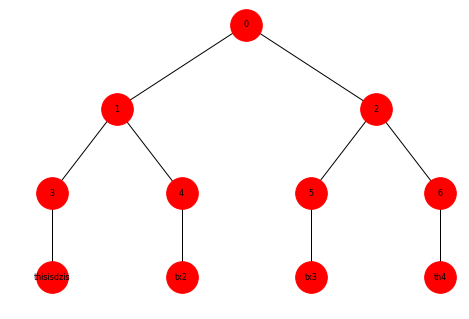

In [35]:
G1 = nx.Graph()
positions1 = {}
coordinates1 = [
    [0, 4],
    [-2, 3],
    [2, 3],
    [-3, 2],
    [-1, 2],
    [1, 2],
    [3, 2],
    [-3, 1],
    [-1, 1],
    [1, 1],
    [3, 1]
]
parents1 = [0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 6]
for index in range(11):
    G1.add_node(index)
    G1.add_edge(index, parents1[index])
    positions1[index] = coordinates1[index]
nx.draw(G1, positions1, node_size = 1000)
labels1 = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: 'thisisdzis',
    8: 'tx2',
    9: 'tx3',
    10: 'th4',
}
nx.draw_networkx_labels(G1, positions, labels = labels1, font_size=8)

{0: Text(0, 4, '55dbaeeeec219486810b1094109a5121bfe67eed39480cf5038fc354bb29f360'),
 1: Text(-2, 3, 'f1438c8cc32d433bb652168ac98456a0494828485970011ed3a03c1e49ccf53b'),
 2: Text(2, 3, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-3, 2, 'be5778c9a98689417fc55c738688f32341b6ca414c20c5bb33567d588f373cb6'),
 4: Text(-1, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(1, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(3, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-3, 1, 'thisisdzis'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'th4')}

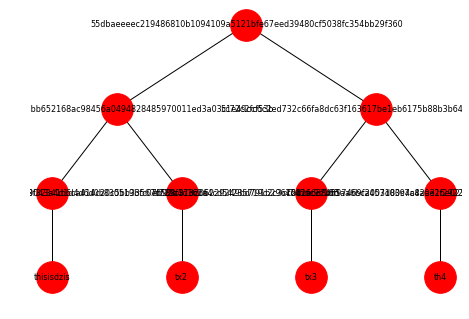

In [36]:
labels1[3] = hashlib.sha256(hashlib.sha256(b"thisisdzis").digest()).hexdigest()
labels1[4] = hashlib.sha256(hashlib.sha256(b"tx2").digest()).hexdigest()
labels1[5] = hashlib.sha256(hashlib.sha256(b"tx3").digest()).hexdigest()
labels1[6] = hashlib.sha256(hashlib.sha256(b"tx4").digest()).hexdigest()
concat_34 = labels1[3] + labels1[4]
concat_56 = labels1[5] + labels1[6]
labels1[1] = hashlib.sha256(hashlib.sha256(concat_34.encode('utf-8')).digest()).hexdigest()
labels1[2] = hashlib.sha256(hashlib.sha256(concat_56.encode('utf-8')).digest()).hexdigest()
concat_12 = labels1[1] + labels1[2]
labels1[0] = hashlib.sha256(hashlib.sha256(concat_12.encode('utf-8')).digest()).hexdigest()
nx.draw(G1, positions1, node_size = 1000)
nx.draw_networkx_labels(G1, positions1, labels = labels1, font_size = 8)

5.Nodes in Merkle hash trees may have arbitrary fanout. In previouse items we consider the case of fanout equals to two. But what will change if we set a fanout equals to three? Construct Merkle hash trees with fanout 3 to sign 9 values? Construct the hash tree with fanout 2 to sign the same set of values? Plot obtained trees (4 points) 

{0: Text(0, 4, '0'),
 1: Text(-4, 3, '1'),
 2: Text(0, 3, '2'),
 3: Text(4, 3, '3'),
 4: Text(-5, 2, '4'),
 5: Text(-4, 2, '5'),
 6: Text(-3, 2, '6'),
 7: Text(-1, 2, '7'),
 8: Text(0, 2, '8'),
 9: Text(1, 2, '9'),
 10: Text(3, 2, '10'),
 11: Text(4, 2, '11'),
 12: Text(5, 2, '12'),
 13: Text(-5, 1, 'tx1'),
 14: Text(-4, 1, 'tx2'),
 15: Text(-3, 1, 'tx3'),
 16: Text(-1, 1, 'tx4'),
 17: Text(0, 1, 'tx5'),
 18: Text(1, 1, 'tx6'),
 19: Text(3, 1, 'tx7'),
 20: Text(4, 1, 'tx8'),
 21: Text(5, 1, 'tx9')}

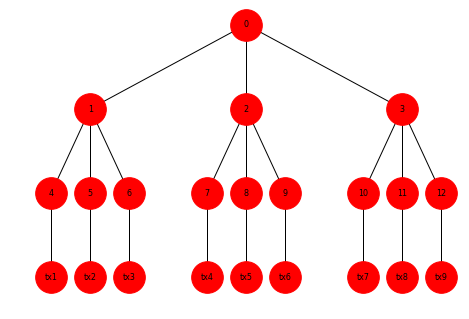

In [37]:
G2 = nx.Graph()
positions2 = {}
coordinates2 = [
    [0, 4],
    [-4, 3],
    [0, 3],
    [4, 3],
    [-5, 2],
    [-4, 2],
    [-3, 2],
    [-1, 2],
    [0, 2],
    [1, 2],
    [3, 2],
    [4, 2],
    [5, 2],
    [-5, 1],
    [-4, 1],
    [-3, 1],
    [-1, 1],
    [0, 1],
    [1, 1],
    [3, 1],
    [4, 1],
    [5, 1]
    
    
]
parents2 = [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for index in range(22):
    G2.add_node(index)
    G2.add_edge(index, parents2[index])
    positions2[index] = coordinates2[index]
nx.draw(G2, positions2, node_size = 1000)
labels3 = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12',
    13: 'tx1',
    14: 'tx2',
    15: 'tx3',
    16: 'tx4',
    17: 'tx5',
    18: 'tx6',
    19: 'tx7',
    20: 'tx8',
    21: 'tx9'
}
nx.draw_networkx_labels(G2, positions2,labels=labels3, font_size=8)

{0: Text(0, 4, 'e7296a950ce7691ac317379ed5ab311cb1cdd4904b59ed20d410bc51b7f69196'),
 1: Text(-4, 3, '66ed30b63243fcd5bd1b7414b59e2c2346ea01ca124d58651653ee4e5f47a43b'),
 2: Text(0, 3, 'c8cfb3fc3818c0aa840299e590ce437472935b00cf9f2b49ea559f7e3f8c012f'),
 3: Text(4, 3, 'd9dccb4196250a8861ce62b1f8e7e44563c936562337a98cb39d5f69c4696501'),
 4: Text(-5, 2, '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 5: Text(-4, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 6: Text(-3, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 7: Text(-1, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 8: Text(0, 2, '929e74a52e6f0d8390d60d631d6dc8fb6cde5f10c04c7053bc94ce3f62759823'),
 9: Text(1, 2, 'ccd702558bb588ba5d49d2ec85af0453fae434476f205ad6caa93da525f86627'),
 10: Text(3, 2, '038edc078728e6455aa202890dec7d4635f2180e999f1a7c280c0283e5dc9ccf'),
 11: Text(4, 2, '9cb58fa7c7cf21f3e426c113f8f48c115402a476024f21edd7db6

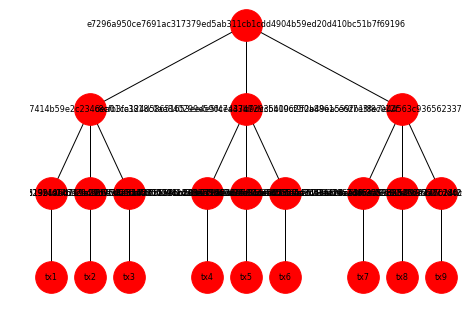

In [38]:
labels3[4] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()
labels3[5] = hashlib.sha256(hashlib.sha256(b"tx2").digest()).hexdigest()
labels3[6] = hashlib.sha256(hashlib.sha256(b"tx3").digest()).hexdigest()
labels3[7] = hashlib.sha256(hashlib.sha256(b"tx4").digest()).hexdigest()
labels3[8] = hashlib.sha256(hashlib.sha256(b"tx5").digest()).hexdigest()
labels3[9] = hashlib.sha256(hashlib.sha256(b"tx6").digest()).hexdigest()
labels3[10] = hashlib.sha256(hashlib.sha256(b"tx7").digest()).hexdigest()
labels3[11] = hashlib.sha256(hashlib.sha256(b"tx8").digest()).hexdigest()
labels3[12] = hashlib.sha256(hashlib.sha256(b"tx9").digest()).hexdigest()
conct_456 = labels3[4] + labels3[5] + labels3[6]
conct_789 = labels3[7] + labels3[8] + labels3[9]
conct_012 = labels3[10] + labels3[11] + labels3[12]
labels3[1] = hashlib.sha256(hashlib.sha256(conct_456.encode('utf-8')).digest()).hexdigest()
labels3[2] = hashlib.sha256(hashlib.sha256(conct_789.encode('utf-8')).digest()).hexdigest()
labels3[3] = hashlib.sha256(hashlib.sha256(conct_012.encode('utf-8')).digest()).hexdigest()
conct_123 = labels3[1] + labels3[2] + labels3[3]
labels3[0] = hashlib.sha256(hashlib.sha256(conct_123.encode('utf-8')).digest()).hexdigest()
nx.draw(G2, positions2, node_size = 1000)
nx.draw_networkx_labels(G2, positions2,labels=labels3, font_size=8)

We should extend our tree to size 16, we will do it by coping tx9.

{0: Text(0, 5, '0'),
 1: Text(-8, 4, '1'),
 2: Text(8, 4, '2'),
 3: Text(-12, 3, '3'),
 4: Text(-4, 3, '4'),
 5: Text(4, 3, '5'),
 6: Text(12, 3, '6'),
 7: Text(-14, 2, '7'),
 8: Text(-10, 2, '8'),
 9: Text(-6, 2, '9'),
 10: Text(-2, 2, '10'),
 11: Text(2, 2, '11'),
 12: Text(6, 2, '12'),
 13: Text(10, 2, '13'),
 14: Text(14, 2, '14'),
 15: Text(-15, 1, '15'),
 16: Text(-13, 1, '16'),
 17: Text(-11, 1, '17'),
 18: Text(-9, 1, '18'),
 19: Text(-7, 1, '19'),
 20: Text(-5, 1, '20'),
 21: Text(-3, 1, '21'),
 22: Text(-1, 1, '22'),
 23: Text(1, 1, '23'),
 24: Text(3, 1, '24'),
 25: Text(5, 1, '25'),
 26: Text(7, 1, '26'),
 27: Text(9, 1, '27'),
 28: Text(11, 1, '28'),
 29: Text(13, 1, '29'),
 30: Text(15, 1, '30'),
 31: Text(-15, 0, 'tx1'),
 32: Text(-13, 0, 'tx2'),
 33: Text(-11, 0, 'tx3'),
 34: Text(-9, 0, 'tx4'),
 35: Text(-7, 0, 'tx5'),
 36: Text(-5, 0, 'tx6'),
 37: Text(-3, 0, 'tx7'),
 38: Text(-1, 0, 'tx8'),
 39: Text(1, 0, 'tx9'),
 40: Text(3, 0, 'tx9'),
 41: Text(5, 0, 'tx9'),
 42: 

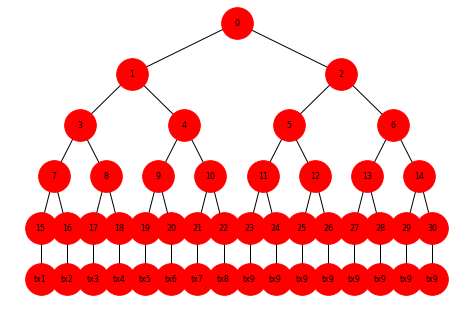

In [39]:
G3 = nx.Graph()
positions3 = {}
coordinates3 = [
    [0, 5],
    [-8, 4],
    [8, 4],
    [-12, 3],
    [-4, 3],
    [4, 3],
    [12, 3],
    [-14, 2],
    [-10, 2],
    [-6, 2],
    [-2, 2],
    [2, 2],
    [6, 2],
    [10, 2],
    [14, 2],
    [-15, 1],
    [-13, 1],
    [-11, 1],
    [-9, 1],
    [-7, 1],
    [-5, 1],
    [-3, 1],
    [-1, 1],
    [1, 1],
    [3, 1],
    [5, 1],
    [7, 1],
    [9, 1],
    [11, 1],
    [13, 1],
    [15, 1],
    [-15, 0],
    [-13, 0],
    [-11, 0],
    [-9, 0],
    [-7, 0],
    [-5, 0],
    [-3, 0],
    [-1, 0],
    [1, 0],
    [3, 0],
    [5, 0],
    [7, 0],
    [9, 0],
    [11, 0],
    [13, 0],
    [15, 0],
]
parents3 = [0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5,5, 6, 6, 7, 7, 8, 8, 9, 9, 10,10, 11,11,12, 12, 13,13, 14,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,30]
for index in range(47):
    G3.add_node(index)
    G3.add_edge(index, parents3[index])
    positions3[index] = coordinates3[index]
nx.draw(G3, positions3, node_size = 1000)
label = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12',
    13: '13',
    14: '14',
    15: '15',
    16: '16',
    17: '17',
    18: '18',
    19: '19',
    20: '20',
    21: '21',
    22: '22',
    23: '23',
    24: '24',
    25: '25',
    26: '26',
    27: '27',
    28: '28',
    29: '29',
    30: '30',
    31: 'tx1',
    32: 'tx2',
    33: 'tx3',
    34: 'tx4',
    35: 'tx5',
    36: 'tx6',
    37: 'tx7',
    38: 'tx8',
    39: 'tx9',
    40: 'tx9',
    41: 'tx9',
    42: 'tx9',
    43: 'tx9',
    44: 'tx9',
    45: 'tx9',
    46: 'tx9',
}
nx.draw_networkx_labels(G3, positions3,labels = label, font_size=8)

{0: Text(0, 5, 'ad988af921a45aede9fb4929a5158cc18c71feee30135bc143d5184870157a5d'),
 1: Text(-8, 4, '7ed0ef1f4a0f7e02413d0f19708f9bde561158a5edd44315ea84e0f18ad7bce3'),
 2: Text(8, 4, 'f95b1a31b5b385a4beb19750f1a55eb190fa4052cb64c612267667aea5b42e0b'),
 3: Text(-12, 3, '5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88'),
 4: Text(-4, 3, 'd39c3a46d7a6dfcf4442264d564bd484d32bc7d4cf4557d66cf23564c20d90e9'),
 5: Text(4, 3, 'ea8c9a579d6169511871640390c3ec3ebbf1d1e3a2223a2480dbcee394fcf39d'),
 6: Text(12, 3, 'ea8c9a579d6169511871640390c3ec3ebbf1d1e3a2223a2480dbcee394fcf39d'),
 7: Text(-14, 2, '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106'),
 8: Text(-10, 2, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 9: Text(-6, 2, 'd6729da948be8eb1fddfc506ce39885194787a93bef6b3ab9086e1685bddfc2f'),
 10: Text(-2, 2, 'ea7690966598257569c816a598a57638cfd7b0b1e43b1bf5d0a62f4de981a7e8'),
 11: Text(2, 2, 'cd3acf8e7b2176aa890427af14600cba77dc39175d8c4f8

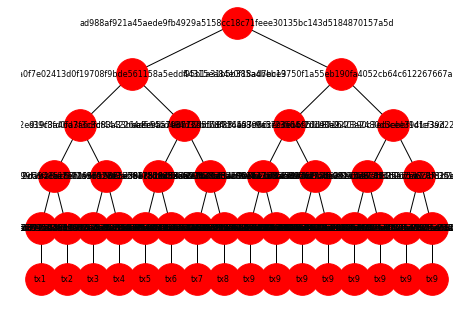

In [40]:
label[15] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()
label[16] = hashlib.sha256(hashlib.sha256(b"tx2").digest()).hexdigest()
label[17] = hashlib.sha256(hashlib.sha256(b"tx3").digest()).hexdigest()
label[18] = hashlib.sha256(hashlib.sha256(b"tx4").digest()).hexdigest()
label[19] = hashlib.sha256(hashlib.sha256(b"tx5").digest()).hexdigest()
label[20] = hashlib.sha256(hashlib.sha256(b"tx6").digest()).hexdigest()
label[21] = hashlib.sha256(hashlib.sha256(b"tx7").digest()).hexdigest()
label[22] = hashlib.sha256(hashlib.sha256(b"tx8").digest()).hexdigest()
label[23] = hashlib.sha256(hashlib.sha256(b"tx9").digest()).hexdigest()
label[24] = label[23]
label[25] = label[23]
label[26] = label[23]
label[27] = label[23]
label[28] = label[23]
label[29] = label[23]
label[30] = label[23]
cnct_7 = label[15] + label[16]
cnct_8 = label[17] + label[18]
cnct_9 = label[19] + label[20]
cnct_10 = label[21] + label[22]
cnct_11 = label[23] + label[24]
cnct_12 = label[25] + label[26]
cnct_13 = label[27] + label[28]
cnct_14 = label[29] + label[30]
label[7] = hashlib.sha256(hashlib.sha256(cnct_7.encode('utf-8')).digest()).hexdigest()
label[8] = hashlib.sha256(hashlib.sha256(cnct_8.encode('utf-8')).digest()).hexdigest()
label[9] = hashlib.sha256(hashlib.sha256(cnct_9.encode('utf-8')).digest()).hexdigest()
label[10] = hashlib.sha256(hashlib.sha256(cnct_10.encode('utf-8')).digest()).hexdigest()
label[11] = hashlib.sha256(hashlib.sha256(cnct_11.encode('utf-8')).digest()).hexdigest()
label[12] = hashlib.sha256(hashlib.sha256(cnct_12.encode('utf-8')).digest()).hexdigest()
label[13] = hashlib.sha256(hashlib.sha256(cnct_13.encode('utf-8')).digest()).hexdigest()
label[14] = hashlib.sha256(hashlib.sha256(cnct_14.encode('utf-8')).digest()).hexdigest()
cnct_3 = label[7] + label[8]
cnct_4 = label[9] + label[10]
cnct_5 = label[11] + label[12]
cnct_6 = label[13] + label[14]
label[3] = hashlib.sha256(hashlib.sha256(cnct_3.encode('utf-8')).digest()).hexdigest()
label[4] = hashlib.sha256(hashlib.sha256(cnct_4.encode('utf-8')).digest()).hexdigest()
label[5] = hashlib.sha256(hashlib.sha256(cnct_5.encode('utf-8')).digest()).hexdigest()
label[6] = hashlib.sha256(hashlib.sha256(cnct_6.encode('utf-8')).digest()).hexdigest()
cnct_1 = label[3] + label[4]
cnct_2 = label[5] +label[6]
label[1] = hashlib.sha256(hashlib.sha256(cnct_1.encode('utf-8')).digest()).hexdigest()
label[2] = hashlib.sha256(hashlib.sha256(cnct_2.encode('utf-8')).digest()).hexdigest()
cnct_0 = label[1] + label[2]
label[0] = hashlib.sha256(hashlib.sha256(cnct_0.encode('utf-8')).digest()).hexdigest()
nx.draw(G3, positions3, node_size = 1000)
nx.draw_networkx_labels(G3, positions3,labels=label, font_size=8)

6.What is the optimum tree fanout for signing first 4 values in the set up of previouse item? (2 points)

The goal is to find optimal tree fanout for 9 values to sign first 4 values. Despite of all, we have to count at least this 4 hash values to valid this values. So the goal of finding optimal fanout equals to the goal minimizing an amount of hashes to recount. From the previous task we can see, that fanout 2 and 3 are not so optimal, as it's expected to be: fanout 3 gives 6 recounts, fanout 2 gives 8 recounts. The optimal fanout is 9, because we have to recount only 4 values, which is minimum, that we can achieve.